<center>
    <h1> Seminario de Modelos y Métodos Cuantitativos </h1>
    <h2> Tarea 2 </h2>
    <br>
    _Gabriel Molina_ -  gabriel.molina.12@sansano.usm.cl  -  rol: 201273575-0
</center>
</center>

In [1]:
from math import sqrt
from IPython.display import Math, Latex
from IPython.display import Image, display
from collections import defaultdict
import cairocffi as cairo
import random
import igraph as ig
import numpy as np
import matplotlib.pylab as plt

# ---- utility
def plot_as_png(plot):
    sur = plot._surface 
    ctx = plot._ctx 
    plot.redraw(ctx)
    sur.write_to_png('/tmp/temp.png') 
    display(Image('/tmp/temp.png'))

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


# 3.

In [2]:
edges = [(0, 1), (0, 2), (1, 2), (2, 3), (3, 4), (3, 5), (4, 5)]

g = ig.Graph(directed=False)
g.add_vertices(6)
g.add_edges(edges)
k = g.vs.degree()
l = np.zeros((6, 6))
for i in range(6):
    for j in range(6):
        if i == j:
            l[i, j] = k[i]
        elif g.get_eid(i, j, error=False) != -1:
            l[i, j] = - 1
        else:
            l[i, j] = 0
            
Math(r'L=\begin{pmatrix}'+ " \\\\\n".join([" & ".join(map(str,line)) for line in l]) +'\end{pmatrix}')

<IPython.core.display.Math object>

Calculo valores y vectores propios <a href="https://www.wolframalpha.com/input/?i=%5B%5B+2,+-1,+-1,++0,++0,++0%5D,+%5B-1,++2,+-1,++0,++0,++0%5D,+%5B-1,+-1,++3,+-1,++0,++0%5D,+%5B+0,++0,+-1,++3,+-1,+-1%5D,+%5B+0,++0,++0,+-1,++2,+-1%5D,+%5B+0,++0,++0,+-1,+-1,++2%5D%5D">wolframalpha</a>
$$ \lambda_5 =  \frac{1}{2}\left( 5 - \sqrt{17} \right) $$

$$\lambda_5 = 0.4385 $$

$$ v_5 = \left( -1, -1, -0.56, 0.56, 1, 1 \right)$$


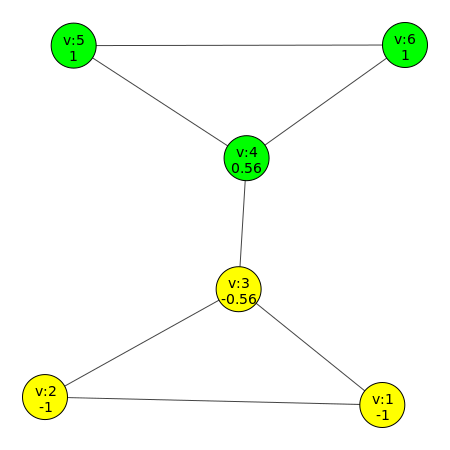

In [3]:
visual_style = {
    'vertex_size':45,
    'vertex_color':['yellow']*3 + ['green']*3,
    'vertex_label':['v:1\n-1', 'v:2\n-1', 'v:3\n-0.56', 'v:4\n0.56', 'v:5\n1', 'v:6\n1'],
    'bbox':(450,450),
    'margin':45,
    'layout':g.layout_auto()
}

plot_as_png(ig.plot(g, **visual_style))

# 4.

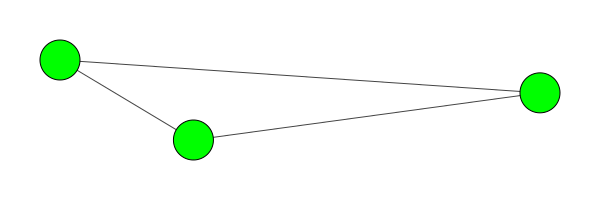

In [4]:
g = ig.Graph()
g.add_vertices(3)
g.add_edges([(0,1), (1,2), (2,0)])

visual_style = {
    'vertex_size':40,
    'bbox':(600,200),
    'margin':60,
    'layout':g.layout("kk")
}
visual_style["vertex_color"] = ["green"]
plot_as_png(ig.plot(g, **visual_style))

# 6.

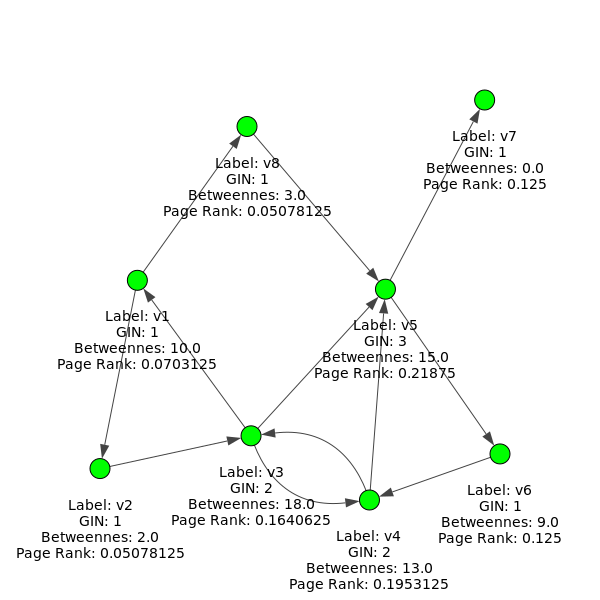

In [5]:
red = ig.Graph.Read_GML("datos/redchica.gml")
#saco datos de la red 
label = red.vs["label"]
indegree = red.vs["indegree"]
etiquetas_reales = []

#pageranks de la documentación de iGraph
betweenness = red.betweenness(directed=True, cutoff=8)
pageRanks = red.pagerank(vertices=None, directed=True, damping=1, weights=None, arpack_options=None, implementation='prpack', niter=1000, eps=0.001)
for i in range(len(indegree)):
    etiquetas_reales.append("Label: "+label[i]+"\nGIN: " + str(indegree[i])+"\nBetweennes: "+ str(betweenness[i])+"\nPage Rank: "+ str(pageRanks[i]))
    
layout = red.layout("fr")
style = {}

style["vertex_label"] = etiquetas_reales
style["layout"] = layout
style['vertex_label_dist']= 3
style["edge_width"]= 1
style["bbox"] = (600, 600)
style["margin"] = 100
style["vertex_color"] = ["green"]

plot_as_png(ig.plot(red, **style))


#### b) Se realizo "al ojo"

### 7.

In [6]:
visual_style = {'vertex_size':15,'vertex_label_size':10,'vertex_color':'green','bbox':(600,600),'margin':100}

def random_delete(graph):
    return random.randint(0, graph.vcount() -1)

def grade_delete(graph):
    grade = graph.vs.degree()
    max_grade = max(grade)
    return grade.index(max_grade)

def betweeneess_delete(graph):
    betweenness = graph.betweenness()
    max_bet = max(betweenness)
    return betweenness.index(max_bet)

def do_atack(graph, del_fun):
    copy_graph = graph.copy()
    max_degree = max(copy_graph.vs.degree())/2.
    amount = 0
    while max_degree < max(copy_graph.vs.degree()):
        vertice_id = del_fun(copy_graph)
        copy_graph.delete_vertices(vertice_id)
        amount += 1
    return (amount,ig.plot(copy_graph, **visual_style))

Red dolphins antes del ataque

Red Antes del Ataque


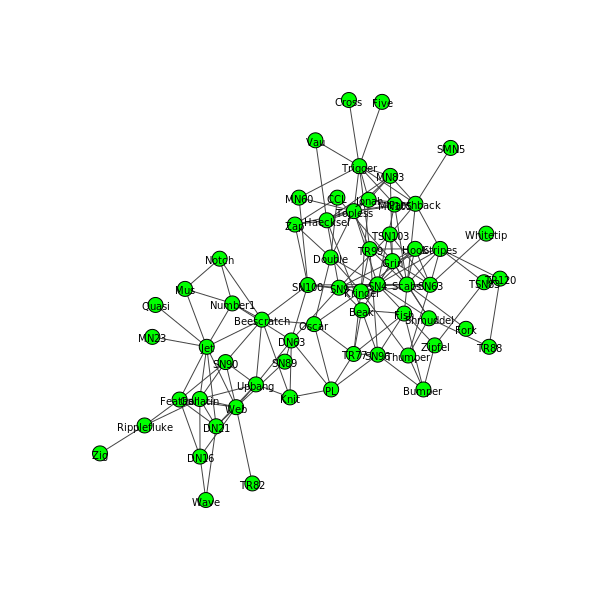

Eliminando Nodos al azar
Cantidad promedio de nodos eliminados:  31.22
Porcentaje de nodos eliminados:  50.35 %


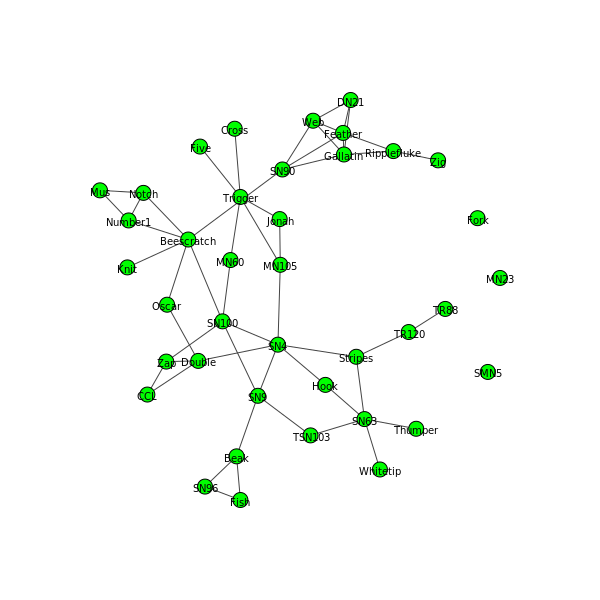

Eliminando nodos en orden de grado decreciente
Cantidad promedio de nodos eliminados:  10
Porcentaje de nodos eliminados:  16.129 %


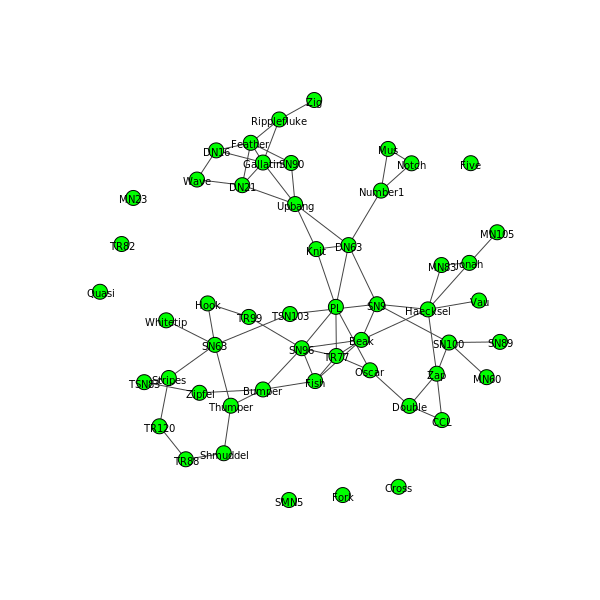

Eliminando nodos en orde de betweenees decreciente
Cantidad promedio de nodos eliminados:  17
Porcentaje de nodos eliminados:  27.419 %


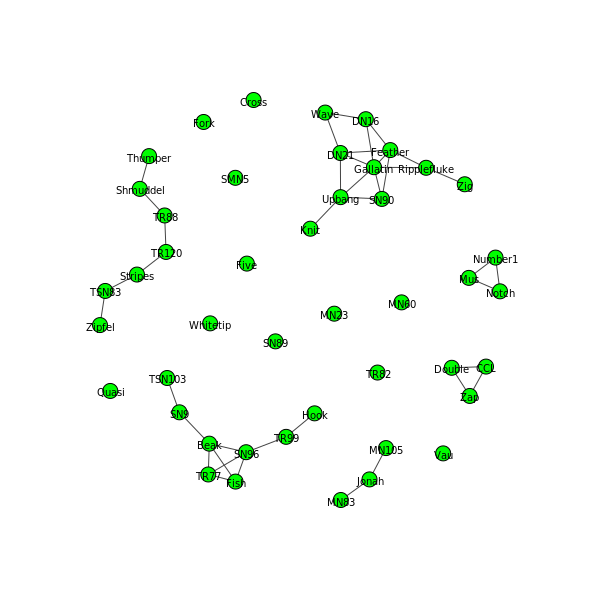

In [7]:
g = ig.Graph.Read_GML('datos/dolphins.gml')
v_init = float(g.vcount())

print("Red Antes del Ataque")
plot_as_png(ig.plot(g, **visual_style))

print("Eliminando Nodos al azar")
aux = []
for i in range(50):
    c_random, g_random = do_atack(g, random_delete)
    aux.append(c_random)
print ('Cantidad promedio de nodos eliminados: ', np.mean(aux))
print ('Porcentaje de nodos eliminados: ', round(100*np.mean(aux)/v_init,2), '%')
plot_as_png(g_random)

print("Eliminando nodos en orden de grado decreciente")

c_grade, g_grade = do_atack(g, grade_delete)
print('Cantidad promedio de nodos eliminados: ', c_grade)
print('Porcentaje de nodos eliminados: ', round(100*c_grade/v_init,3), '%')
plot_as_png(g_grade)

print("Eliminando nodos en orde de betweenees decreciente")
c_bet, g_bet = do_atack(g, betweeneess_delete)
print('Cantidad promedio de nodos eliminados: ', c_bet)
print('Porcentaje de nodos eliminados: ', round(100*c_bet/v_init,3), '%')
plot_as_png(g_bet)

Erdos-Renyi con la misma cantidad de nodos y densidad de aristas y su red antes del ataque:

red original


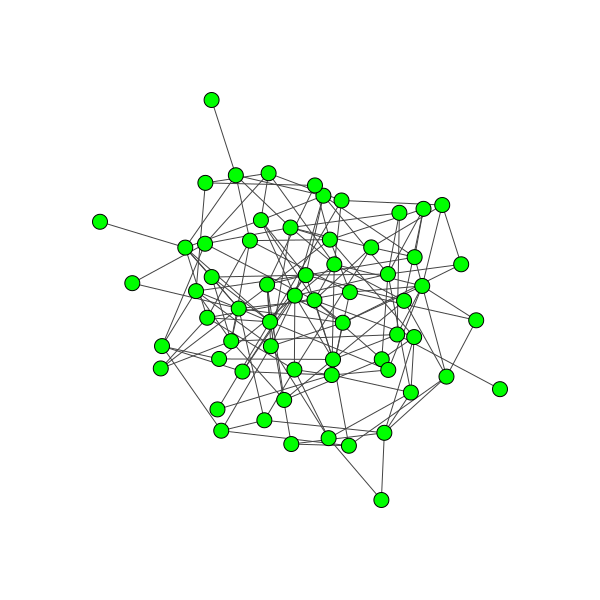

matar nodos al azar
Cantidad promedio de nodos eliminados:  33.18
Porcentaje de nodos eliminados:  53.52 %


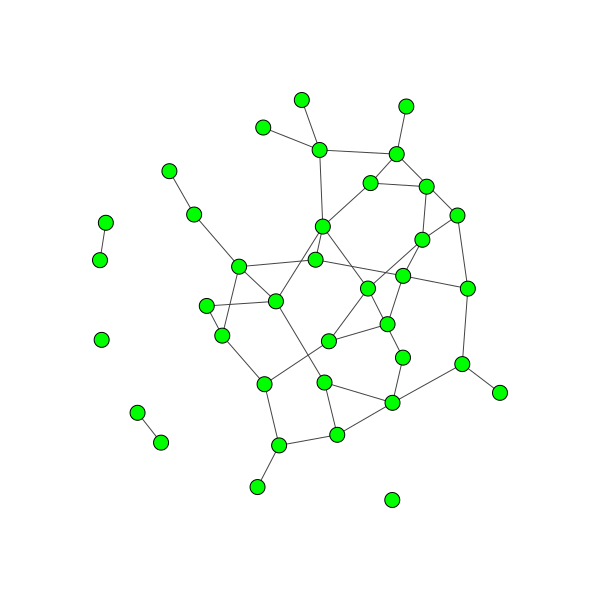

matar nodos en orden de grado descendiente
Cantidad promedio de nodos eliminados:  12
Porcentaje de nodos eliminados:  19.355 %


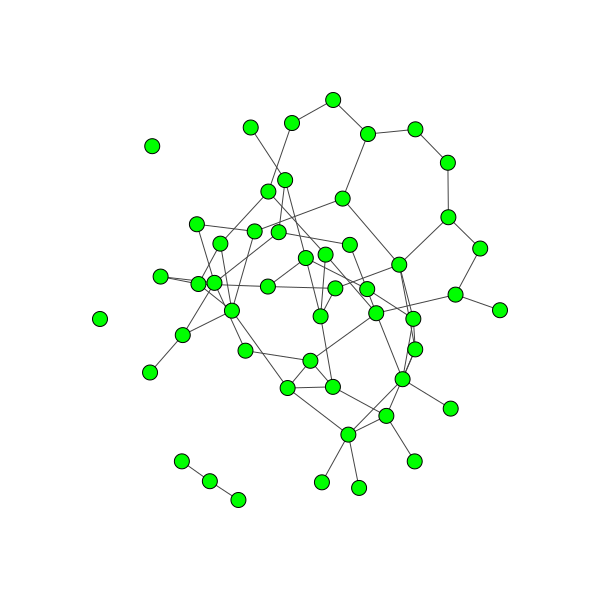

matar nodos en orde de betweenees descendiente
Cantidad promedio de nodos eliminados:  16
Porcentaje de nodos eliminados:  25.806 %


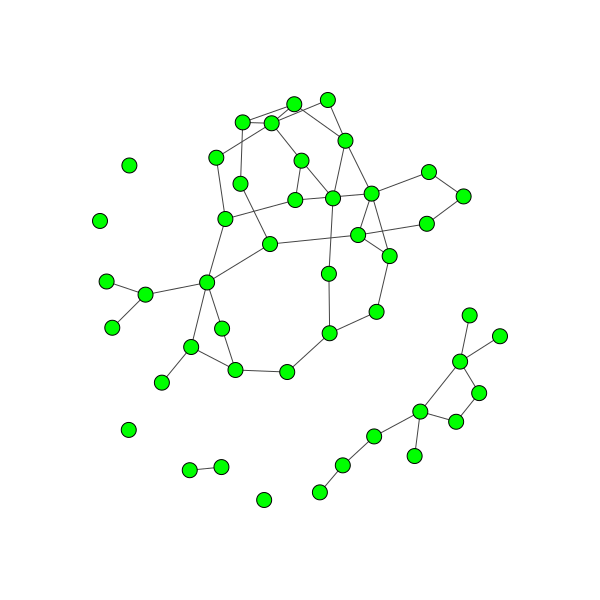

In [8]:

print("red original")
g = ig.Graph.Erdos_Renyi(n=g.vcount(), m=g.ecount())
plot_as_png(ig.plot(g, **visual_style))

print("matar nodos al azar")
aux = []
for i in range(50):
    c_random, g_random = do_atack(g, random_delete)
    aux.append(c_random)
print( 'Cantidad promedio de nodos eliminados: ', np.mean(aux))
print ('Porcentaje de nodos eliminados: ', round(100*np.mean(aux)/v_init,2), '%')
plot_as_png(g_random)


print("matar nodos en orden de grado descendiente")
c_grade, g_grade = do_atack(g, grade_delete)
print ('Cantidad promedio de nodos eliminados: ', c_grade)
print ('Porcentaje de nodos eliminados: ', round(100*c_grade/v_init,3), '%')
plot_as_png(g_grade)

print("matar nodos en orde de betweenees descendiente")
c_bet, g_bet = do_atack(g, betweeneess_delete)
print ('Cantidad promedio de nodos eliminados: ', c_bet)
print ('Porcentaje de nodos eliminados: ', round(100*c_bet/v_init,3), '%')
plot_as_png(g_bet)

- Ataque red gnutella.

In [9]:
g = ig.Graph.Read_GML('datos/gnutella.gml')
v_init = float(g.vcount())

Red gnutella original


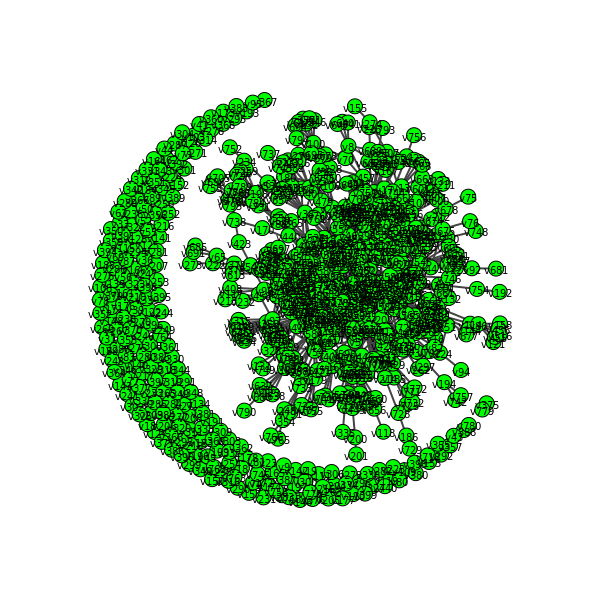

matando nodos al azar
Cantidad promedio de nodos eliminados:  402.96
Porcentaje de nodos eliminados:  50.69 %


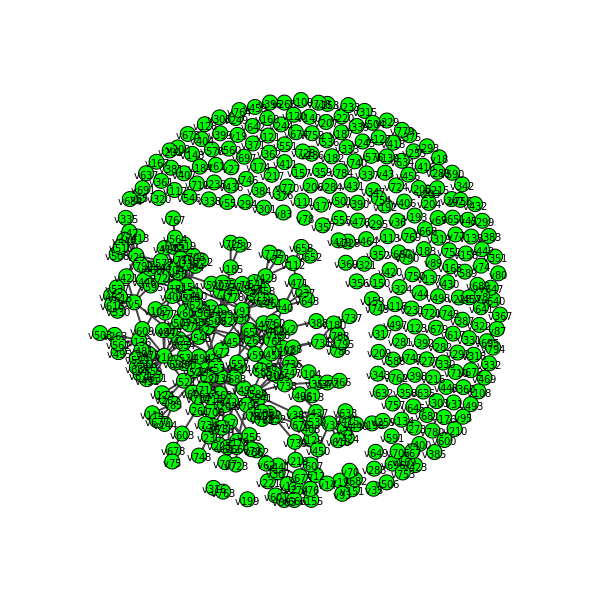

matar nodos en orden de grado descendiente
Cantidad promedio de nodos eliminados:  13
Porcentaje de nodos eliminados:  1.635 %


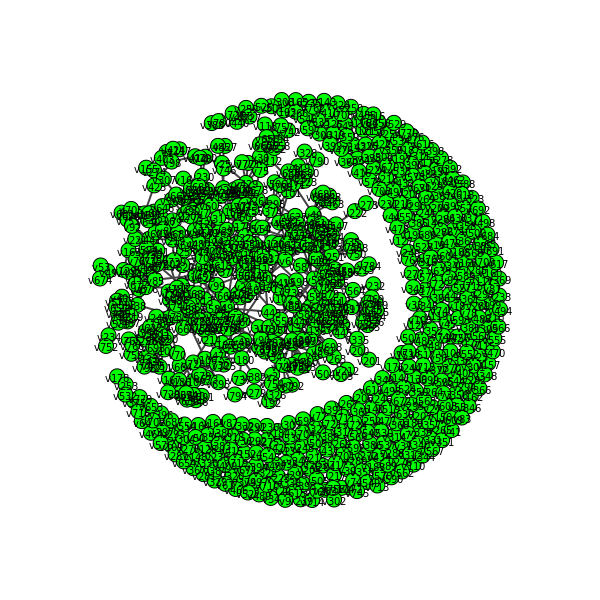

matar nodos en orde de betweenees descendiente
Cantidad promedio de nodos eliminados:  21
Porcentaje de nodos eliminados:  2.642 %


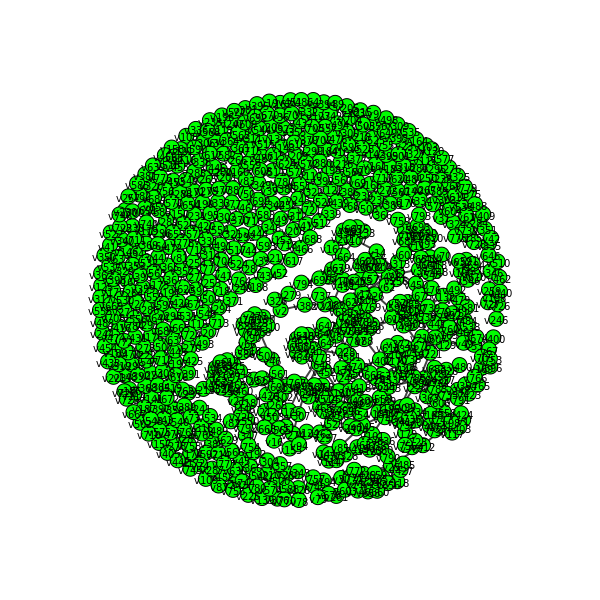

In [10]:
print("Red gnutella original")
plot_as_png(ig.plot(g, **visual_style))

print("matando nodos al azar")
aux = []
for i in range(50):
    c_random, g_random = do_atack(g, random_delete)
    aux.append(c_random)
print ('Cantidad promedio de nodos eliminados: ', np.mean(aux))
print ('Porcentaje de nodos eliminados: ', round(100*np.mean(aux)/v_init,2), '%')
plot_as_png(g_random)

print("matar nodos en orden de grado descendiente")
c_grade, g_grade = do_atack(g, grade_delete)
print ('Cantidad promedio de nodos eliminados: ', c_grade)
print ('Porcentaje de nodos eliminados: ', round(100*c_grade/v_init,3), '%')
plot_as_png(g_grade)

print("matar nodos en orde de betweenees descendiente")
c_bet, g_bet = do_atack(g, betweeneess_delete)
print ('Cantidad promedio de nodos eliminados: ', c_bet)
print ('Porcentaje de nodos eliminados: ', round(100*c_bet/v_init,3), '%')
plot_as_png(g_bet)

Red Erdos-Renyi

In [11]:
g = ig.Graph.Erdos_Renyi(n=g.vcount(), m=g.ecount())

Red Erdos-Renyi original


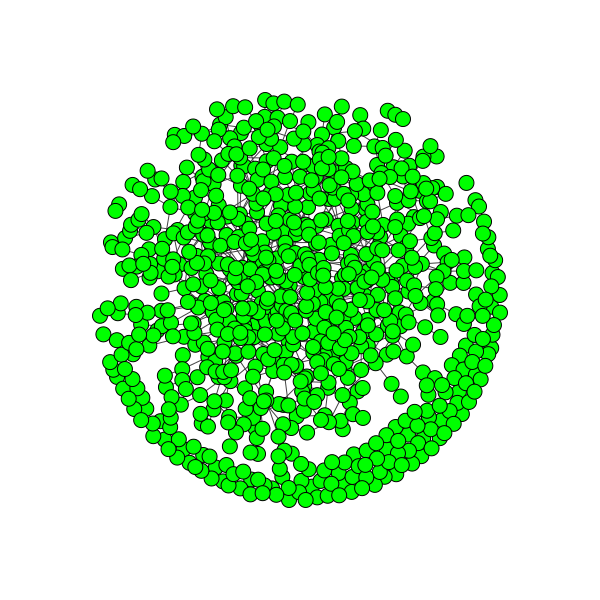

matando nodos al azar
Cantidad promedio de nodos eliminados:  434.12
Porcentaje de nodos eliminados:  54.61 %


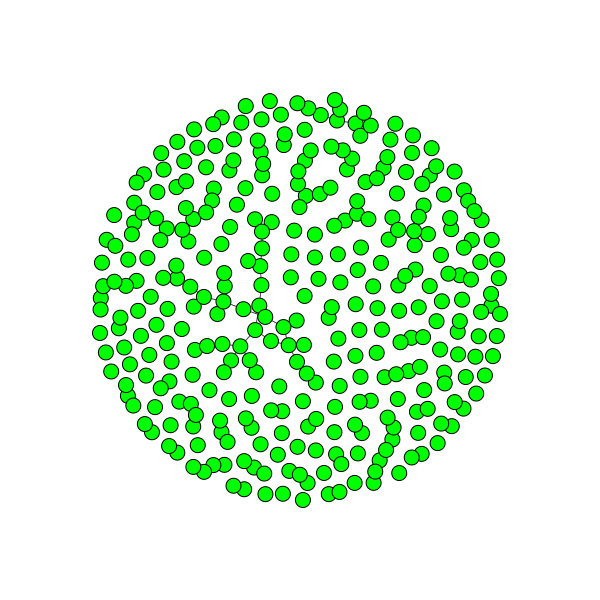

matar nodos en orden de grado descendiente
Cantidad promedio de nodos eliminados:  13
Porcentaje de nodos eliminados:  1.635 %


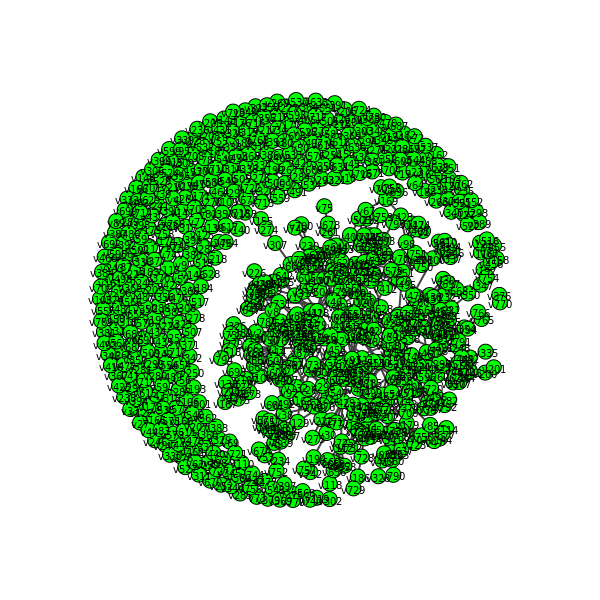

matar nodos en orde de betweenees descendiente
Cantidad promedio de nodos eliminados:  21
Porcentaje de nodos eliminados:  2.642 %


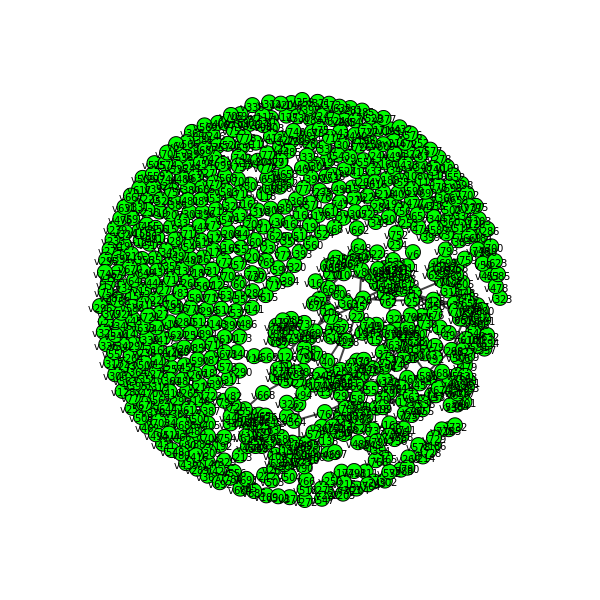

In [12]:
print("Red Erdos-Renyi original")
plot_as_png(ig.plot(g, **visual_style))

print("matando nodos al azar")
for i in range(50):
    c_random, g_random = do_atack(g, random_delete)
    aux.append(c_random)
print ('Cantidad promedio de nodos eliminados: ', np.mean(aux))
print ('Porcentaje de nodos eliminados: ', round(100*np.mean(aux)/v_init,2), '%')
plot_as_png(g_random)

print("matar nodos en orden de grado descendiente")
print ('Cantidad promedio de nodos eliminados: ', c_grade)
print ('Porcentaje de nodos eliminados: ', round(100*c_grade/v_init,3), '%')
plot_as_png(g_grade)

print("matar nodos en orde de betweenees descendiente")
print ('Cantidad promedio de nodos eliminados: ', c_bet)
print ('Porcentaje de nodos eliminados: ', round(100*c_bet/v_init,3), '%')
plot_as_png(g_bet)

# 8.

#### a) 

In [15]:
go = ig.Graph.Read_GML('datos/data_T1.gml')
v_count = g.vcount()
e_count = g.ecount()
o_cores = go.k_core([1,2,3,4,5,6,7,8,9,10])

ge = ig.Graph.Erdos_Renyi(n=v_count, m=e_count)
e_cores = ge.k_core([1,2,3,4,5,6,7,8,9,10])

gb = ig.Graph.Barabasi(n=v_count, m=5)
b_cores = gb.k_core([1,2,3,4,5,6,7,8,9,10])

gr = ig.Graph.Read_GML('datos/data_T1.gml')
gr.rewire(g.ecount()*2)
r_cores = gr.k_core([1,2,3,4,5,6,7,8,9,10])

st = 'Red\t\t1-core\t2-core\t3-core\t4-core\t5-core\t6-core\t7-core\t8-core\t9-core\t10-core\n'
st += 'Original\t' + '\t'.join(map(lambda x: str(x.vcount()), o_cores))
st += '\nErdos Renyi\t' + '\t'.join(map(lambda x: str(x.vcount()), e_cores))
st += '\nBarabasi-Alber\t' + '\t'.join(map(lambda x: str(x.vcount()), b_cores))
st += '\nRewrite\t\t' + '\t'.join(map(lambda x: str(x.vcount()), r_cores))
print(st)

Red		1-core	2-core	3-core	4-core	5-core	6-core	7-core	8-core	9-core	10-core
Original	1773	1773	1401	1115	889	726	604	497	401	301
Erdos Renyi	1772	1772	1768	1760	1717	1657	1461	0	0	0
Barabasi-Alber	1773	1773	1773	1773	1773	0	0	0	0	0
Rewrite		1773	1773	1386	1112	868	707	582	462	333	263


#### b)

Para determinar la modularidad de las redes se utilizara el algoritmo fast greedy, implementado en la librería igraph.es.

In [16]:
go.community_fastgreedy().as_clustering().modularity

0.4680202176761009

In [17]:
ge.community_fastgreedy().as_clustering().modularity

0.2681271404081607

In [18]:
gb.community_fastgreedy().as_clustering().modularity

0.26332475342334577

In [19]:
gr.community_fastgreedy().as_clustering().modularity

0.25669435289006515

#### c)

In [20]:
go.assortativity_degree(directed=False)

-0.04884969132039569

In [21]:
ge.assortativity_degree(directed=False)

0.016904425544614854

In [22]:
gb.assortativity_degree(directed=False)

-0.2679380892067114

In [23]:
gr.assortativity_degree(directed=False)

-0.08703334892930957

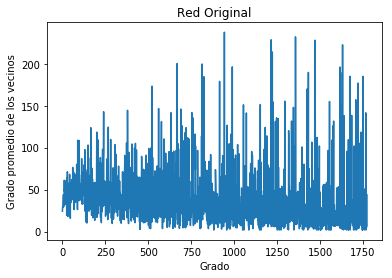

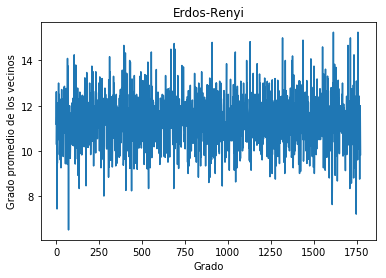

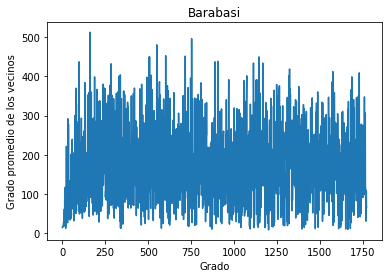

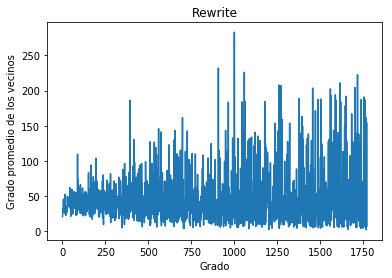

In [28]:

plt.figsize=(12,10)
plt.plot(go.knn()[0])
plt.xlabel('Grado')
plt.ylabel('Grado promedio de los vecinos')
plt.title('Red Original')
plt.show()

plt.figsize=(12,10)
plt.plot(ge.knn()[0])
plt.xlabel('Grado')
plt.ylabel('Grado promedio de los vecinos')
plt.title('Erdos-Renyi')
plt.show()

plt.figsize=(12,10)
plt.plot(gb.knn()[0])
plt.xlabel('Grado')
plt.ylabel('Grado promedio de los vecinos')
plt.title('Barabasi')
plt.show()

plt.figsize=(12,10)
plt.plot(gr.knn()[0])
plt.xlabel('Grado')
plt.ylabel('Grado promedio de los vecinos')
plt.title('Rewrite')
plt.show()